# Lid-driven cavity

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(42, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, iRe=1/1000, Co=2, fractionalStep=False)

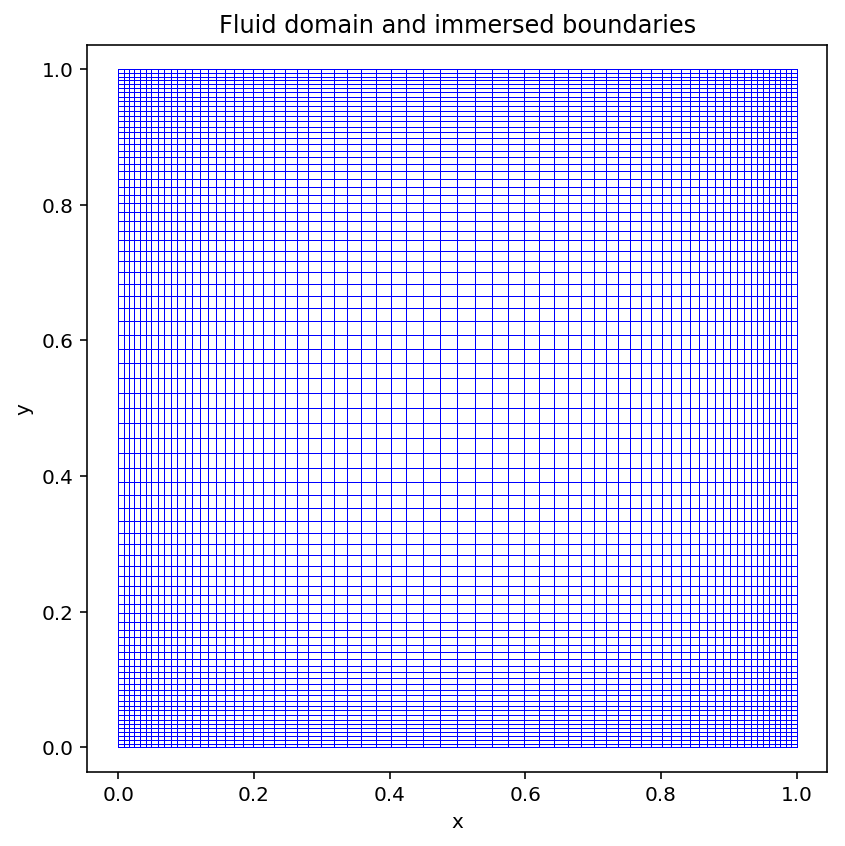

In [4]:
solver.plot_domain()

## Boundary conditions

In [5]:
fuBC = (lambda s, t: np.zeros_like(s),)*3 + (lambda s, t: np.ones_like(s),)
fvBC = (lambda s, t: np.zeros_like(s),)*4

## Unsteady simulation

In [6]:
%%time
x, t, infodict = solver.steps(solver.zero(), fuBC, fvBC, number=int(50/solver.dt), verbose=int(5/solver.dt))

Initializing solver...done
       k            t          x_2       dxdt_2 
     450  4.99461e+00  1.73831e+01  2.21952e+00 
     900  9.98921e+00  1.93202e+01  1.15853e+00 
    1350  1.49838e+01  2.10877e+01  6.49327e-01 
    1800  1.99784e+01  2.21635e+01  2.95482e-01 
    2250  2.49730e+01  2.26721e+01  1.12957e-01 
    2700  2.99676e+01  2.28899e+01  4.28205e-02 
    3150  3.49622e+01  2.29860e+01  1.82127e-02 
    3600  3.99568e+01  2.30328e+01  9.29199e-03 
    4050  4.49514e+01  2.30585e+01  5.51276e-03 
    4500  4.99461e+01  2.30739e+01  3.56912e-03 
    4504  4.99905e+01  2.30740e+01  3.55710e-03 
CPU times: user 23min 37s, sys: 37.4 s, total: 24min 14s
Wall time: 52.2 s


## Display results

Plot velocity components and pressure.

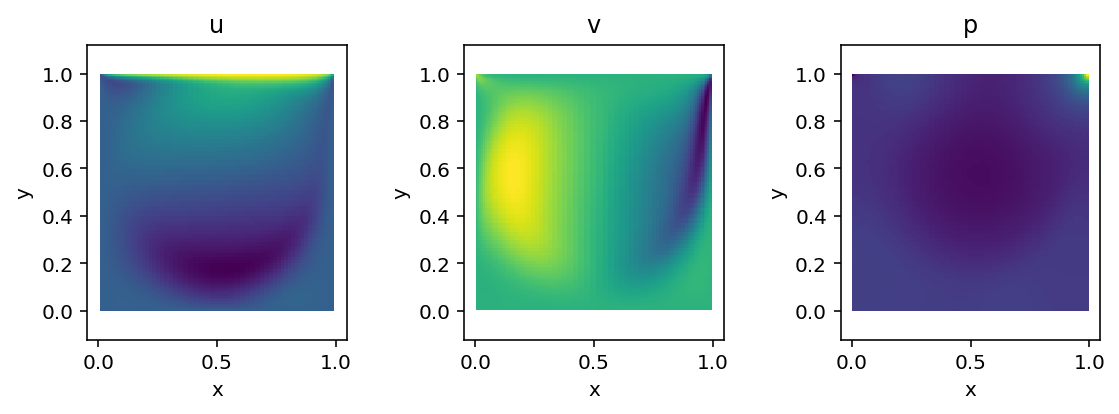

In [7]:
solver.plot_field(x, xlim=(0, 1), ylim=(0, 1))

Check results against Ghia et al. (1982)

In [8]:
ghia = np.loadtxt("101-LidDrivenCavityRe1000_Ghia.csv", skiprows=1)

In [9]:
u, v, p = solver.reshape(solver.unpack(x), 0)

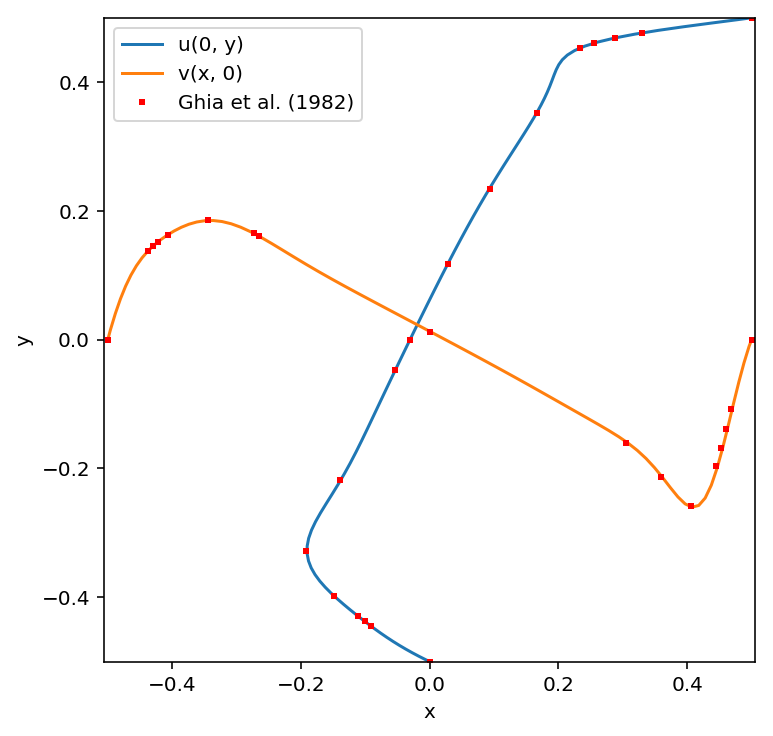

In [10]:
plt.figure(figsize=(5.5, 5.25))

ui = solver.fluid.u.shape[1]//2
uu = np.r_[fuBC[2](solver.fluid.u.x[ui], 0), u[:,ui], fuBC[3](solver.fluid.u.x[ui], 0)]
uy = np.r_[solver.fluid.y[0], solver.fluid.u.y, solver.fluid.y[-1]]
plt.plot(0.5*uu, uy-0.5, label='u(0, y)');
plt.plot(0.5*ghia[:,1], ghia[:,0]-0.5,'sr', ms=2)

vi = solver.fluid.v.shape[0]//2
vv = np.r_[fvBC[0](solver.fluid.v.x[vi], 0), v[vi,:], fvBC[1](solver.fluid.v.x[vi], 0)]
vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]
plt.plot(vx-0.5, 0.5*vv, label='v(x, 0)');
plt.plot(ghia[:,2]-0.5, 0.5*ghia[:,3],'sr', ms=2, label='Ghia et al. (1982)')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);

Plot convergence history

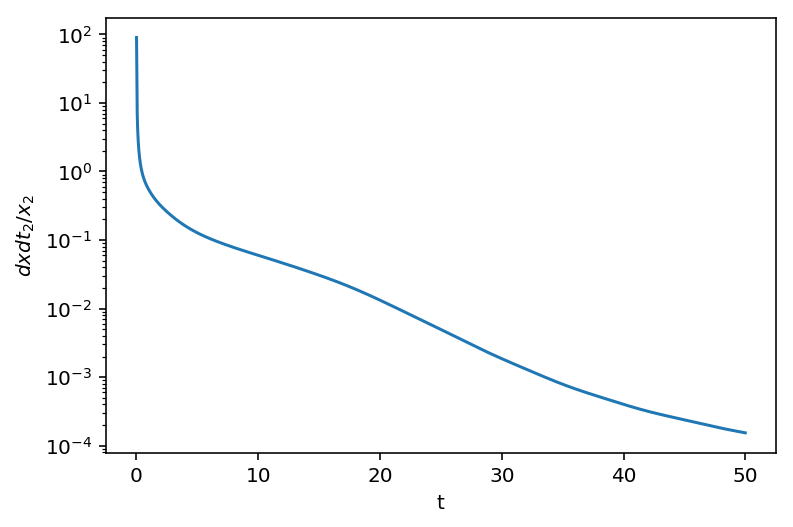

In [11]:
plt.figure()
plt.semilogy(infodict['t'], infodict['dxdt_2']/infodict['x_2'])
plt.xlabel('t')
plt.ylabel(r'$dxdt_2/x_2$');